## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [17]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [18]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [20]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.10, 0.2, 0.25, 0.30, 0.4]

In [23]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for dr in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.6f" % (dr))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dr)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "dr-%s" % str(dr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Dropout = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)     

Epoch 46/50
50000/50000 [==============================] - 23s 460us/step - loss: 1.1710 - accuracy: 0.5776 - val_loss: 1.3579 - val_accuracy: 0.5221
Epoch 47/50
50000/50000 [==============================] - 31s 611us/step - loss: 1.1841 - accuracy: 0.5728 - val_loss: 1.3403 - val_accuracy: 0.5267
Epoch 48/50
50000/50000 [==============================] - 21s 426us/step - loss: 1.1709 - accuracy: 0.5766 - val_loss: 1.3553 - val_accuracy: 0.5182
Epoch 49/50
50000/50000 [==============================] - 22s 448us/step - loss: 1.1661 - accuracy: 0.5795 - val_loss: 1.3703 - val_accuracy: 0.5261
Epoch 50/50
50000/50000 [==============================] - 23s 452us/step - loss: 1.1607 - accuracy: 0.5802 - val_loss: 1.3407 - val_accuracy: 0.5306
Experiment with Dropout = 0.200000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         


50000/50000 [==============================] - 23s 457us/step - loss: 1.4513 - accuracy: 0.4800 - val_loss: 1.4213 - val_accuracy: 0.4892
Epoch 41/50
50000/50000 [==============================] - 22s 441us/step - loss: 1.4398 - accuracy: 0.4819 - val_loss: 1.4007 - val_accuracy: 0.5002
Epoch 42/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.4355 - accuracy: 0.4825 - val_loss: 1.4410 - val_accuracy: 0.4865
Epoch 43/50
50000/50000 [==============================] - 23s 450us/step - loss: 1.4337 - accuracy: 0.4854 - val_loss: 1.4240 - val_accuracy: 0.4927
Epoch 44/50
50000/50000 [==============================] - 27s 544us/step - loss: 1.4314 - accuracy: 0.4865 - val_loss: 1.4102 - val_accuracy: 0.4964
Epoch 45/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.4267 - accuracy: 0.4888 - val_loss: 1.4133 - val_accuracy: 0.4971
Epoch 46/50
50000/50000 [==============================] - 22s 440us/step - loss: 1.4224 - accuracy: 0.4887 - va

50000/50000 [==============================] - 25s 509us/step - loss: 1.5172 - accuracy: 0.4544 - val_loss: 1.4631 - val_accuracy: 0.4817
Epoch 35/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.5236 - accuracy: 0.4530 - val_loss: 1.4615 - val_accuracy: 0.4851
Epoch 36/50
50000/50000 [==============================] - 21s 417us/step - loss: 1.5126 - accuracy: 0.4534 - val_loss: 1.4560 - val_accuracy: 0.4889
Epoch 37/50
50000/50000 [==============================] - 26s 528us/step - loss: 1.5209 - accuracy: 0.4536 - val_loss: 1.4746 - val_accuracy: 0.4817
Epoch 38/50
50000/50000 [==============================] - 29s 577us/step - loss: 1.5115 - accuracy: 0.4586 - val_loss: 1.4746 - val_accuracy: 0.4732
Epoch 39/50
50000/50000 [==============================] - 35s 691us/step - loss: 1.5057 - accuracy: 0.4563 - val_loss: 1.4482 - val_accuracy: 0.4907
Epoch 40/50
50000/50000 [==============================] - 31s 627us/step - loss: 1.5027 - accuracy: 0.4594 - va

50000/50000 [==============================] - 26s 529us/step - loss: 1.6194 - accuracy: 0.4169 - val_loss: 1.5585 - val_accuracy: 0.4471
Epoch 29/50
50000/50000 [==============================] - 26s 516us/step - loss: 1.6056 - accuracy: 0.4226 - val_loss: 1.5434 - val_accuracy: 0.4472
Epoch 30/50
50000/50000 [==============================] - 22s 432us/step - loss: 1.6057 - accuracy: 0.4234 - val_loss: 1.5173 - val_accuracy: 0.4704
Epoch 31/50
50000/50000 [==============================] - 24s 470us/step - loss: 1.6001 - accuracy: 0.4233 - val_loss: 1.5448 - val_accuracy: 0.4562
Epoch 32/50
50000/50000 [==============================] - 29s 587us/step - loss: 1.5964 - accuracy: 0.4222 - val_loss: 1.5138 - val_accuracy: 0.4710
Epoch 33/50
50000/50000 [==============================] - 29s 576us/step - loss: 1.5982 - accuracy: 0.4237 - val_loss: 1.5305 - val_accuracy: 0.4566
Epoch 34/50
50000/50000 [==============================] - 25s 493us/step - loss: 1.5873 - accuracy: 0.4283 - va

50000/50000 [==============================] - 23s 465us/step - loss: 1.7797 - accuracy: 0.3543 - val_loss: 1.7412 - val_accuracy: 0.3912
Epoch 23/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.7739 - accuracy: 0.3531 - val_loss: 1.7447 - val_accuracy: 0.4044
Epoch 24/50
50000/50000 [==============================] - 21s 416us/step - loss: 1.7654 - accuracy: 0.3595 - val_loss: 1.7526 - val_accuracy: 0.4033
Epoch 25/50
50000/50000 [==============================] - 21s 424us/step - loss: 1.7784 - accuracy: 0.3512 - val_loss: 1.7484 - val_accuracy: 0.3998
Epoch 26/50
50000/50000 [==============================] - 20s 394us/step - loss: 1.7605 - accuracy: 0.3610 - val_loss: 1.7072 - val_accuracy: 0.4151
Epoch 27/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.7658 - accuracy: 0.3574 - val_loss: 1.7333 - val_accuracy: 0.4029
Epoch 28/50
50000/50000 [==============================] - 20s 403us/step - loss: 1.7605 - accuracy: 0.3602 - va

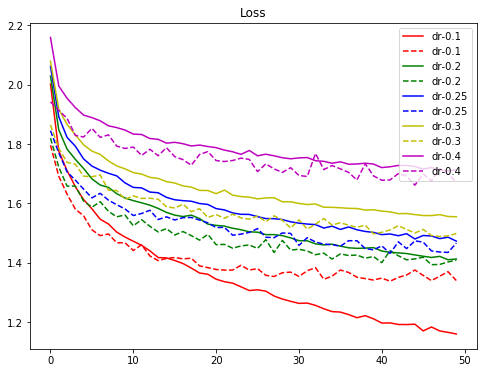

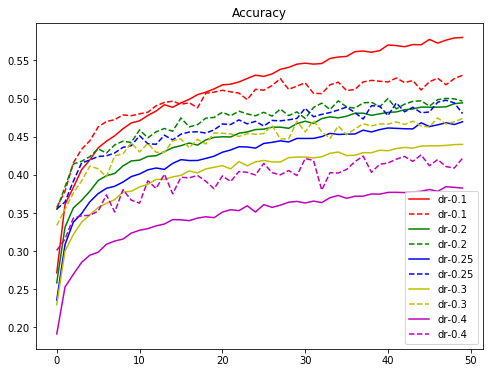

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()